# Question 3: Education Level and income
### Guiding question: Is the Education level of the head of the household related to household income? 

In [57]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
bmx = pd.read_sas('BMX_I.XPT')
demo = pd.read_sas('DEMO_I.XPT')
#combine two tables together
finalData = pd.merge(left = demo,right = bmx,on = 'SEQN')


### Use the variable: INDHHIN2 for household income. Use DMDHREDU for the education level of the head of the household.

#### Filter to adults aged 20 and older.

In [58]:
adultData = finalData.loc[finalData.loc[:,'RIDAGEYR']>=20]
adultData=adultData.dropna(how='any',subset=['INDHHIN2','DMDHREDU'])

#### Remove people who are missing, refused to answer, or didn’t know the household income or education levels.

#### Remove household income categories 12 (\$20,000 and over) and 13 (under \$20,000) as they don’t quite fit in with the other income categories.

In [59]:
adultData=adultData.loc[adultData.loc[:,'INDHHIN2']!=77.0]
adultData=adultData.loc[adultData.loc[:,'INDHHIN2']!=99.0]
adultData=adultData.loc[adultData.loc[:,'INDHHIN2']!=12.0]
adultData=adultData.loc[adultData.loc[:,'INDHHIN2']!=13.0]
adultData=adultData.loc[adultData.loc[:,'DMDHREDU']!=7.0]
adultData=adultData.loc[adultData.loc[:,'DMDHREDU']!=9.0]

#### Print the shape of the resulting data before the next step

In [60]:
print(adultData.shape)

(4720, 72)


#### Summarize and display the data to explore the relationship between education level and income.

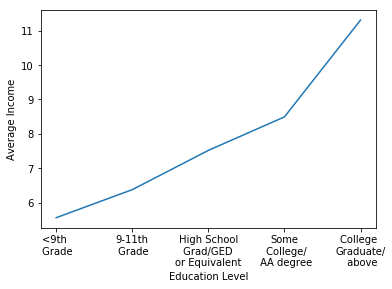

In [61]:
adultData = adultData.loc[:,['INDHHIN2','DMDHREDU','SEQN']]
countData = adultData.groupby(['DMDHREDU']).mean()
test = adultData.groupby('DMDHREDU')['INDHHIN2'].mean()
ax = plt.plot(countData.index,countData.loc[:,'INDHHIN2'])
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.xticks(np.arange(1,6,1),['<9th \n Grade','9-11th\n Grade','High School\n Grad/GED \nor Equivalent','Some\n College/\n AA degree','College \nGraduate/\n above'])
plt.xticks
plt.show()

As we can see, the $\textbf{average income}$ seems to be higher for those who have higher education level. However, it is not certain it is due to the outlier in each group.
Thus, we now try to plot the box plot.

Text(0,0.5,'Income')

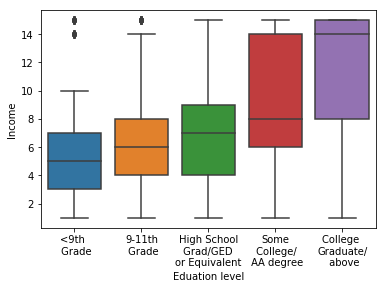

In [62]:
ax = sns.boxplot(adultData.loc[:,'DMDHREDU'],adultData.loc[:,'INDHHIN2'])
ax.set_xlabel('Eduation level')
ax.set_xticklabels(['<9th \n Grade','9-11th\n Grade','High School\n Grad/GED \nor Equivalent','Some\n College/\n AA degree','College \nGraduate/\n above'])
ax.set_ylabel('Income')

From the above figure, we can see the average income rise dramatically when people graduate from college. However, the third quartile is already higher than those who has lower education level. We may make the first assumption that **people's income may increase when the have higher education level**, especially those who enter colleage or above. However, it is still not clear for those with AA degree. Thus we need to further invesgate the distribution. 

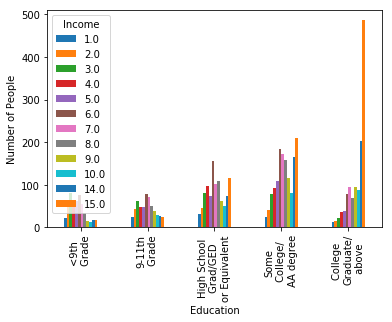

In [63]:
countData = adultData.pivot_table(index = 'DMDHREDU', columns = 'INDHHIN2', values = 'SEQN',aggfunc = 'count')
ax = countData.plot(kind='bar')
ax.set_xticklabels(['<9th \n Grade','9-11th\n Grade','High School\n Grad/GED \nor Equivalent','Some\n College/\n AA degree','College \nGraduate/\n above'])
ax.set_xlabel('Education')
ax.set_ylabel('Number of People')
ax.legend(title='Income')
plt.show()

We can see that for those have AA degree, their income have a M shape distribution, which means the gap between higher and lower income become larger (which is also suggested by the box plot). In conclusion, we may say **The higher the education level is, the higher income you may get,especially for those who graduated from college. In addition, even for those who only got AA degrees, they still have high chance to get high income**